In [23]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [24]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [25]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "training/PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [26]:
className=dataset.class_names

In [27]:
# if you are using .take() in tensorflow just understand like .head() in pandas 
# it will return a batch for the tf.data.Dataset

dataset.take(1)
# now you have to iterate over the Batch returned by the take()



<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [33]:
for image_batch, labels_batch in dataset.take(3):
    print(image_batch.shape)
    print("aaaa")
    print(labels_batch.numpy())

(32, 256, 256, 3)
aaaa
[0 0 0 0 1 0 0 1 0 0 2 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1]
(32, 256, 256, 3)
aaaa
[0 1 1 1 1 1 0 1 0 0 0 0 2 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1]
(32, 256, 256, 3)
aaaa
[0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 2]


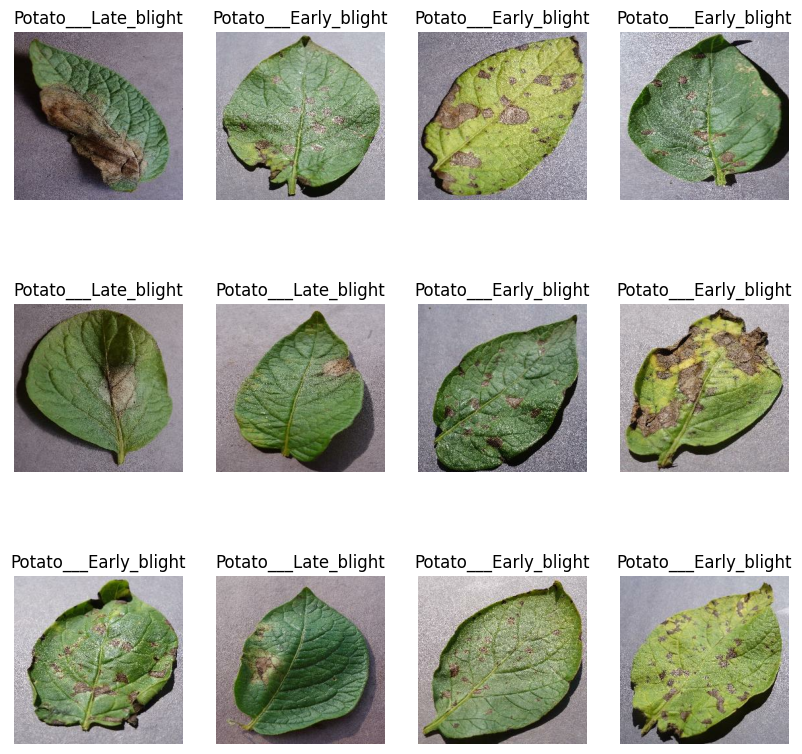

In [48]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4,  i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(className[labels_batch[i]])
        plt.axis("off")

In [49]:
len(dataset)

68

In [ ]:
# for training===>80%
# for test===>    20%
#     validation==>10
#     test      ==>10

training_size=0.8
